In [213]:
import numpy as np
import matplotlib.pyplot as plt
import padasip as pa
%matplotlib inline

**(i) H(z) = 0.25 + z^-1 + 0.25z^-2**

Here I calculate v(n), x and u(n). 

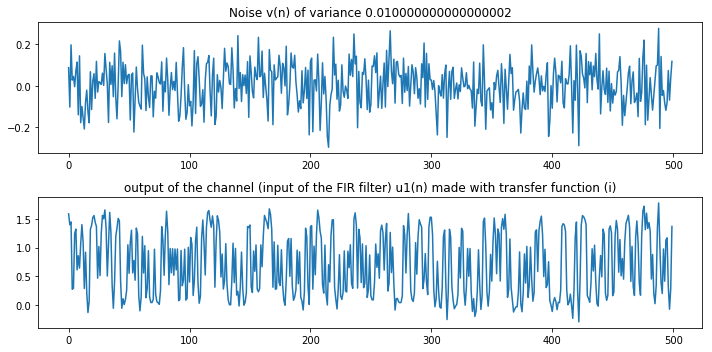

In [299]:
N = 500
mean_v = 0
std_v = 0.1#the standard deviation is 0.1, that means the variance is 0.01
v = np.random.normal(mean_v, std_v, size=N)#noise
x = np.random.binomial(1, .5, N)#chanel input
u1 = np.zeros(N)#output of the channel for (i)
for i in range(N):
    u1[i] = 0.25*x[i]+x[i-1]+0.25*x[i-2]+v[i]
    #output of the channel y(n)+v(n)=u1(n) made with transfer function (i)
plt.figure(figsize=(10,5))
plt.subplot(211)
plt.plot(v)
plt.title('Noise v(n) of variance '+format(std_v**2))
plt.subplot(212)
plt.plot(u1)
plt.title('output of the channel (input of the FIR filter) u1(n) made with transfer function (i)')
plt.tight_layout()
plt.show()

# a)

Here I calculate the output of the LMS FIR equalizer y(n), the estimation error e(n) and the tap weights. I also calculate which delay of x gives the smallest mean square error.

In [300]:
w=np.zeros((N+1,21))#21 tap weights
e=np.zeros((N,N))#N 'rolls' (results for delayed x) x N runs
mu=0.001
y=np.zeros(N)
for j in range(N):
    x_=np.roll(x,j)#delayed version of x, desired output
    for i in range(N):
            y[i]=np.sum(np.dot(w[i,:],u1[i]))
            e[j][i] =x_[i]-y[i]#estimation error
            w[i+1,:]=w[i,:]+mu*u1[i]*e[j][i]#tap wights

sum_mse=np.zeros(N)#sum of the mean square erros for each of the N 'rolls'
for k in range(N):
    for m in range(N):
        sum_mse[k]=sum_mse[k]+e[k][m]**2
        
for i in range(N):
    if(sum_mse[i]==min(sum_mse)):
        A=i
        print('The optimum value of the delay that minimizes the mean-square error is '+format(A))

The optimum value of the delay that minimizes the mean-square error is 1


# b)

Here I plot the learning curve for 100 Monte Carlo runs of the experiment, averaging the squared value of the error signal over the ensemble of 100 independent Monte Carlo runs. The delay for x is 1, obatined previusly.

In [286]:
N=500
A_MC=np.zeros((100,N))
mean_v = 0
std_v = 0.1#the standard deviation is 0.1, that means the variance is 0.01
for MC in range(100):#100 Monte Carlo runs
    v = np.random.normal(mean_v, std_v, size=N)#noise
    x = np.random.binomial(1, .5, N)#chanel input
    u1 = np.zeros(N)#output of the channel for (i)
    for i in range(N):
        u1[i] = 0.25*x[i]+x[i-1]+0.25*x[i-2]+v[i]
        #output of the channel y(n)+v(n)=u1(n) made with transfer function (i)
    
    w=np.zeros((N+1,21))#21 tap weights
    e=np.zeros(N)#estimation error
    E=np.zeros(N)#mean square error
    mu=0.001
    y=np.zeros(N)

    x_=np.roll(x,1)#delayed version of x, desired output
    for i in range(N):
            y[i]=np.sum(np.dot(w[i,:],u1[i]))
            e[i] =x_[i]-y[i]#estimation error
            w[i+1,:]=w[i,:]+mu*u1[i]*e[i]#tap wights
            E[i]=pow(e[i],2)#mean square error

    A_MC[MC,:]=E  #100 (MC runs)x 100 (mean square error vector)
   

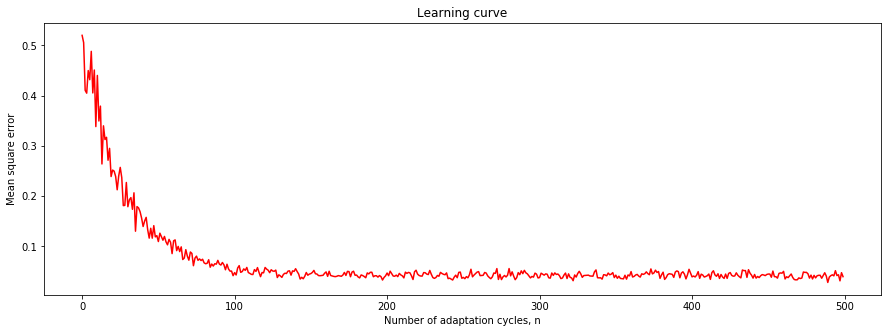

In [287]:
Av_MC=np.mean(A_MC, axis=0)#averaging the 100 MC runs
plt.figure(figsize=(15,5))
plt.plot(Av_MC,'r')#learning curve, Mean square error vs number of adaptation cycles
plt.xlabel('Number of adaptation cycles, n')
plt.ylabel('Mean square error')
plt.title('Learning curve')
plt.show()

**(ii) H(z) = 0.25 + z^-1 - 0.25z^-2**

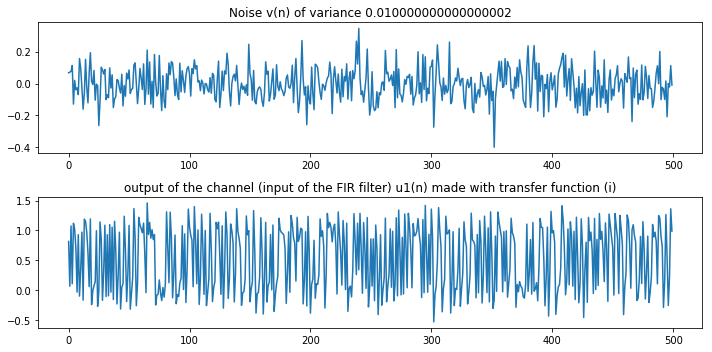

In [301]:
mean_v = 0
std_v = 0.1
v = np.random.normal(mean_v, std_v, size=N)#noise
x = np.random.binomial(1, .5, N)#chanel input
u2 = np.zeros(N)#output of the channel for (i)
for i in range(N):
    u2[i] = 0.25*x[i]+x[i-1]-0.25*x[i-2]+v[i]
    #output of the channel y(n)+v(n)=u1(n) made with transfer function (ii)
plt.figure(figsize=(10,5))
plt.subplot(211)
plt.plot(v)
plt.title('Noise v(n) of variance '+format(std_v**2))
plt.subplot(212)
plt.plot(u2)
plt.title('output of the channel (input of the FIR filter) u1(n) made with transfer function (i)')
plt.tight_layout()
plt.show()

# a)

Here I calculate the output of the LMS FIR equalizer y(n), the estimation error e(n) and the tap weights. I also calculate which delay of x gives the smallest mean square error.

In [302]:
w=np.zeros((N+1,21))#21 tap weights
e=np.zeros((N,N))#N 'rolls' (results for delayed x) x N runs
mu=0.001
y=np.zeros(N)
for j in range(N):
    x_=np.roll(x,j)#delayed version of x, desired output
    for i in range(N):
            y[i]=np.sum(np.dot(w[i,:],u2[i]))
            e[j][i] =x_[i]-y[i]#estimation error
            w[i+1,:]=w[i,:]+mu*u2[i]*e[j][i]#tap wights

sum_mse=np.zeros(N)#sum of the mean square erros for each of the N 'rolls'
for k in range(N):
    for m in range(N):
        sum_mse[k]=sum_mse[k]+e[k][m]**2
        
for i in range(N):
    if(sum_mse[i]==min(sum_mse)):
        print('The optimum value of the delay that minimizes the mean-square error is '+format(i))

The optimum value of the delay that minimizes the mean-square error is 1


# b)

Here I plot the learning curve for 100 Monte Carlo runs of the experiment, averaging the squared value of the error signal over the ensemble of 100 independent Monte Carlo runs. The delay for x is 1, obatined previusly.

In [290]:
N=500
A_MC=np.zeros((100,N))
mean_v = 0
std_v = 0.1#the standard deviation is 0.1, that means the variance is 0.01
for MC in range(100):#100 Monte Carlo runs
    v = np.random.normal(mean_v, std_v, size=N)#noise
    x = np.random.binomial(1, .5, N)#chanel input
    u2 = np.zeros(N)#output of the channel for (i)
    for i in range(N):
        u2[i] = 0.25*x[i]+x[i-1]+0.25*x[i-2]+v[i]
        #output of the channel y(n)+v(n)=u1(n) made with transfer function (i)
    
    w=np.zeros((N+1,21))#21 tap weights
    e=np.zeros(N)#estimation error
    E=np.zeros(N)#mean square error
    mu=0.001
    y=np.zeros(N)

    x_=np.roll(x,1)#delayed version of x, desired output
    for i in range(N):
            y[i]=np.sum(np.dot(w[i,:],u2[i]))
            e[i] =x_[i]-y[i]#estimation error
            w[i+1,:]=w[i,:]+mu*u2[i]*e[i]#tap wights
            E[i]=pow(e[i],2)#mean square error

    A_MC[MC,:]=E  #100 (MC runs)x 100 (mean square error vector)

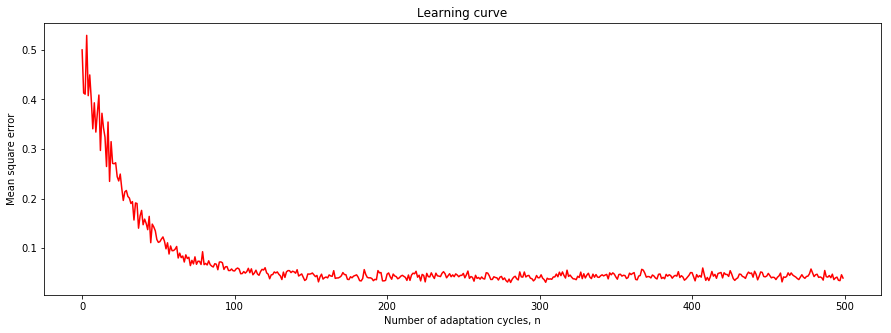

In [291]:
Av_MC=np.mean(A_MC, axis=0)#averaging the 100 MC runs
plt.figure(figsize=(15,5))
plt.plot(Av_MC,'r')#learning curve, Mean square error vs number of adaptation cycles
plt.xlabel('Number of adaptation cycles, n')
plt.ylabel('Mean square error')
plt.title('Learning curve')
plt.show()

**(iii) H(z) = -0.25 + z^-1 + 0.25z^-2**

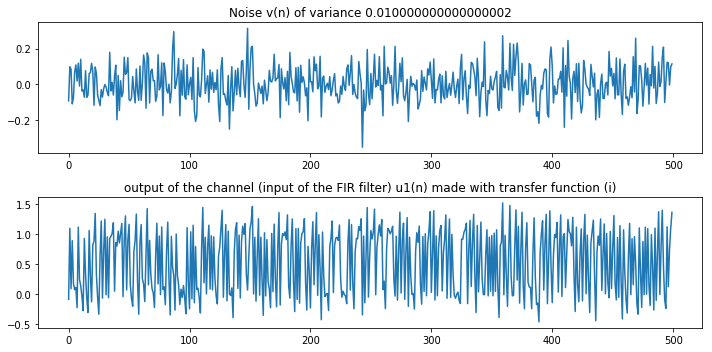

In [303]:
N = 500
mean_v = 0
std_v = 0.1
v = np.random.normal(mean_v, std_v, size=N)#noise
x = np.random.binomial(1, .5, N)#chanel input
u3 = np.zeros(N)#output of the channel for (i)
for i in range(N):
    u3[i] = -0.25*x[i]+x[i-1]+0.25*x[i-2]+v[i]
    #output of the channel y(n)+v(n)=u1(n) made with transfer function (iii)
plt.figure(figsize=(10,5))
plt.subplot(211)
plt.plot(v)
plt.title('Noise v(n) of variance '+format(std_v**2))
plt.subplot(212)
plt.plot(u3)
plt.title('output of the channel (input of the FIR filter) u1(n) made with transfer function (i)')
plt.tight_layout()
plt.show()

# a)

Here I calculate the output of the LMS FIR equalizer y(n), the estimation error e(n) and the tap weights. I also calculate which delay of x gives the smallest mean square error.

In [304]:
w=np.zeros((N+1,21))#21 tap weights
e=np.zeros((N,N))#N 'rolls' (results for delayed x) x N runs
mu=0.001
y=np.zeros(N)
for j in range(N):
    x_=np.roll(x,j)#delayed version of x, desired output
    for i in range(N):
            y[i]=np.sum(np.dot(w[i,:],u3[i]))
            e[j][i] =x_[i]-y[i]#estimation error
            w[i+1,:]=w[i,:]+mu*u3[i]*e[j][i]#tap wights

sum_mse=np.zeros(N)#sum of the mean square erros for each of the N 'rolls'
for k in range(N):
    for m in range(N):
        sum_mse[k]=sum_mse[k]+e[k][m]**2
        
for i in range(N):
    if(sum_mse[i]==min(sum_mse)):
        print('The optimum value of the delay that minimizes the mean-square error is '+format(i))

The optimum value of the delay that minimizes the mean-square error is 1


# b)

 Here I plot the learning curve for 100 Monte Carlo runs of the experiment, averaging the squared value of the error signal over the ensemble of 100 independent Monte Carlo runs. The delay for x is 1, obatined previusly.

In [297]:
N=500
A_MC=np.zeros((100,N))
mean_v = 0
std_v = 0.1#the standard deviation is 0.1, that means the variance is 0.01
for MC in range(100):#100 Monte Carlo runs
    v = np.random.normal(mean_v, std_v, size=N)#noise
    x = np.random.binomial(1, .5, N)#chanel input
    u3 = np.zeros(N)#output of the channel for (i)
    for i in range(N):
        u3[i] = 0.25*x[i]+x[i-1]+0.25*x[i-2]+v[i]
        #output of the channel y(n)+v(n)=u1(n) made with transfer function (i)
    
    w=np.zeros((N+1,21))#21 tap weights
    e=np.zeros(N)#estimation error
    E=np.zeros(N)#mean square error
    mu=0.001
    y=np.zeros(N)

    x_=np.roll(x,1)#delayed version of x, desired output
    for i in range(N):
            y[i]=np.sum(np.dot(w[i,:],u3[i]))
            e[i] =x_[i]-y[i]#estimation error
            w[i+1,:]=w[i,:]+mu*u3[i]*e[i]#tap wights
            E[i]=pow(e[i],2)#mean square error

    A_MC[MC,:]=E  #100 (MC runs)x 100 (mean square error vector)

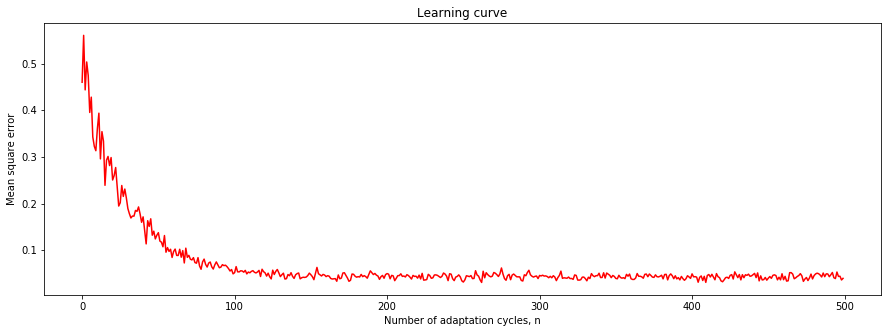

In [298]:
Av_MC=np.mean(A_MC, axis=0)#averaging the 100 MC runs
plt.figure(figsize=(15,5))
plt.plot(Av_MC,'r')#learning curve, Mean square error vs number of adaptation cycles
plt.xlabel('Number of adaptation cycles, n')
plt.ylabel('Mean square error')
plt.title('Learning curve')
plt.show()